In [2]:
#Importing Library
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

README.md: 0.00B [00:00, ?B/s]

C:\Users\bagus\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bagus\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [3]:
df_IND = df[(df['job_country'] == 'Indonesia') & (df['job_title_short'] == 'Data Analyst')].copy()

df_IND = df_IND.dropna(subset=['salary_year_avg'])

In [4]:
df_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_USA = df_USA.dropna(subset=['salary_year_avg'])

In [5]:
df_USA = df_USA.explode('job_skills')

df_USA[['job_skills', 'salary_year_avg']]

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [6]:
df_USA_group = df_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_USA_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [15]:
df_top_pay = df_USA_group.sort_values(by='median', ascending=False).head(10)

df_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [8]:
df_top_count = df_USA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

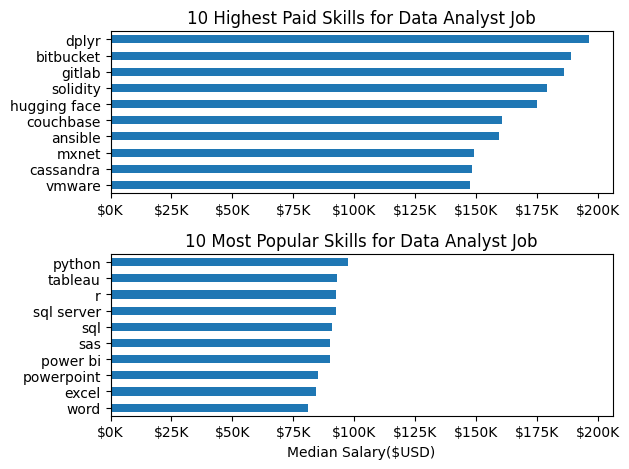

In [14]:
fig, ax = plt.subplots(2, 1)

df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('10 Highest Paid Skills for Data Analyst Job')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('10 Most Popular Skills for Data Analyst Job')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()